In [1]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

In [2]:


def read_geotiff(filename):
    ds = gdal.Open(filename)
    band = ds.GetRasterBand(1)
    arr = band.ReadAsArray()
    return arr, ds

def write_geotiff(filename, arr, in_ds):
    if arr.dtype == np.float32:
        arr_type = gdal.GDT_Float32
    else:
        arr_type = gdal.GDT_Int32

    driver = gdal.GetDriverByName("GTiff")
    out_ds = driver.Create(filename, arr.shape[1], arr.shape[0], 1, arr_type)
    out_ds.SetProjection(in_ds.GetProjection())
    out_ds.SetGeoTransform(in_ds.GetGeoTransform())
    band = out_ds.GetRasterBand(1)
    band.WriteArray(arr)
    band.FlushCache()
    band.ComputeStatistics(False)


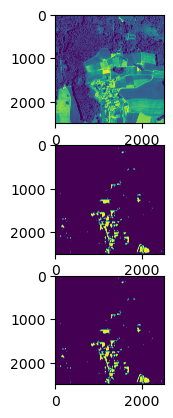

In [5]:

nlcd01_arr, nlcd01_ds = read_geotiff("/Users/siruiwang/Documents/ESPACE-LECTURE/3rd_semester/Big_Geospatial_Data/Pytorch-UNet/data/test/32709_5316.tif")
nlcd16_arr, nlcd16_ds = read_geotiff("/Users/siruiwang/Documents/ESPACE-LECTURE/3rd_semester/Big_Geospatial_Data/Pytorch-UNet/pred.tif")
nlcd_changed=np.zeros(nlcd16_arr.shape)
nlcd_changed[np.where(nlcd16_arr ==1)]=255

write_geotiff("nlcd_changed.tif", nlcd_changed, nlcd01_ds)

plt.subplot(311)
plt.imshow(nlcd01_arr)

plt.subplot(312)
plt.imshow(nlcd16_arr)

plt.subplot(313)
plt.imshow(nlcd_changed)

plt.show()

In [4]:
sum(np.where(nlcd16_arr==1))

array([1255, 1256, 1257, ..., 3742, 3743, 3744])